---
CARREGAR DATASET
---
---

In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('cardio_train.csv', sep=";")

---
VISUALIZAÇÃO DE DADOS
---
---

In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [15]:
print(f"Skewness: \n{df.skew()}")
print(f"\nKurtosis: \n{df.kurt()}")

Skewness: 
id             -0.001278
age            -0.307055
gender          0.630960
height         -0.642187
weight          1.012070
ap_hi          85.296214
ap_lo          32.114083
cholesterol     1.587123
gluc            2.397462
smoke           2.905867
alco            3.956607
active         -1.529473
cardio          0.001200
dtype: float64

Kurtosis: 
id               -1.198374
age              -0.823447
gender           -1.601935
height            7.943653
weight            2.586825
ap_hi          7580.074738
ap_lo          1425.914585
cholesterol       0.993901
gluc              4.294377
smoke             6.444250
alco             13.655125
active            0.339296
cardio           -2.000056
dtype: float64


<AxesSubplot:>

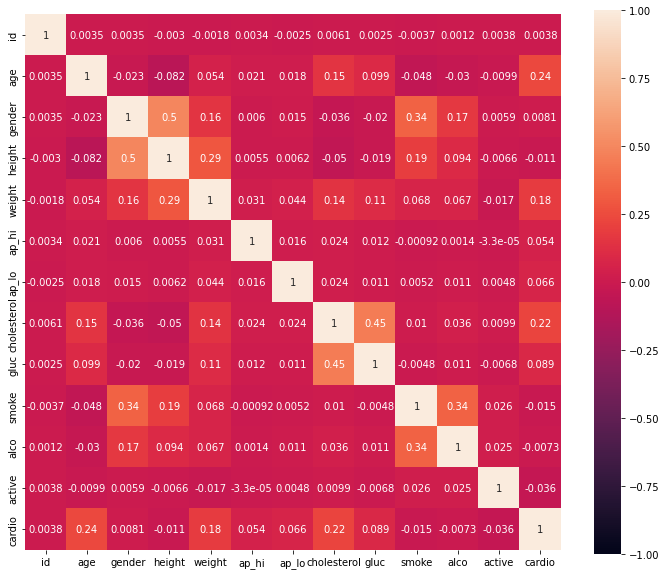

In [16]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [8]:
# verifica se o dataset está equilibrado, quanto ao output

df['cardio'].value_counts() 

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot:xlabel='ap_lo', ylabel='Count'>

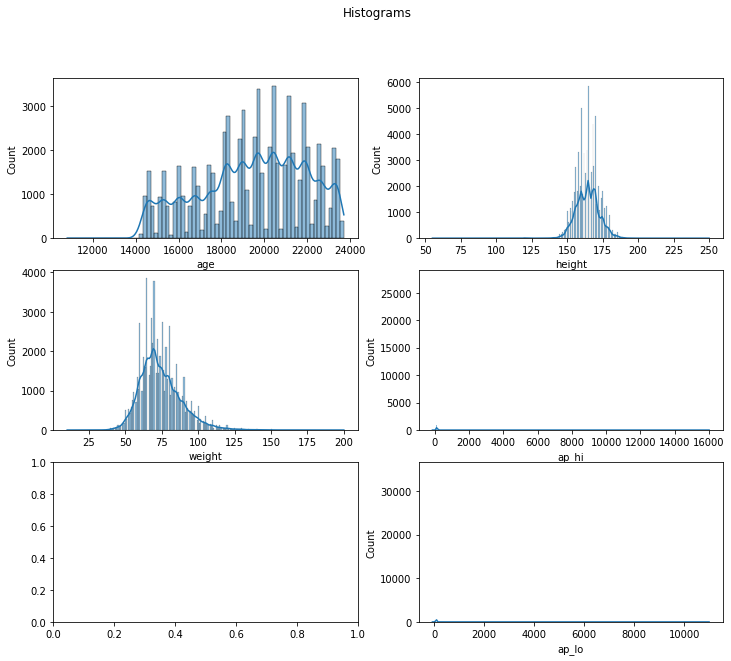

In [14]:
fig, axs = plt.subplots(3,2, figsize = (12,10))
fig.suptitle("Histograms")
sns.histplot(df["age"], ax=axs[0,0], kde=True)
sns.histplot(df["height"], ax=axs[0,1], kde=True)
sns.histplot(df["weight"], ax=axs[1,0], kde=True)
sns.histplot(df["ap_hi"], ax=axs[1,1], kde=True)
sns.histplot(df["ap_lo"], ax=axs[2,1], kde=True)

/media/ray/MR10/UBUNTU/miniconda/envs/envz/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/media/ray/MR10/UBUNTU/miniconda/envs/envz/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/media/ray/MR10/UBUNTU/miniconda/envs/envz/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

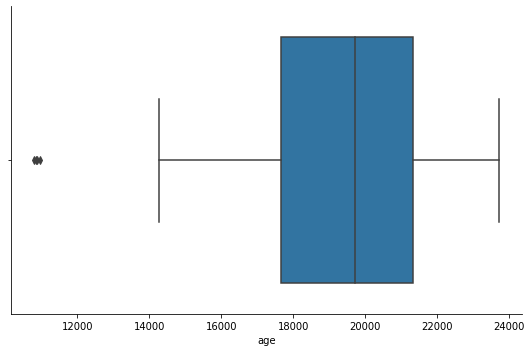

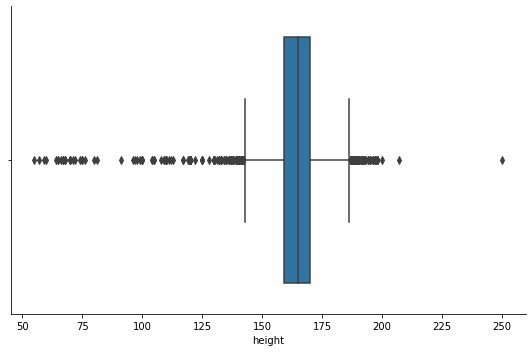

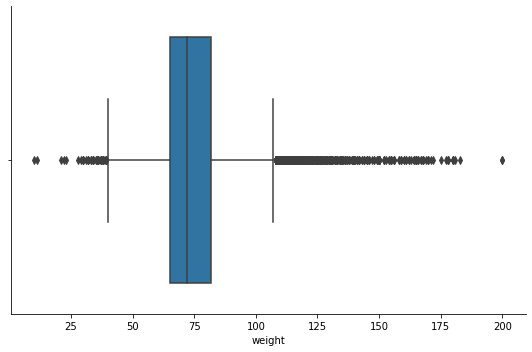

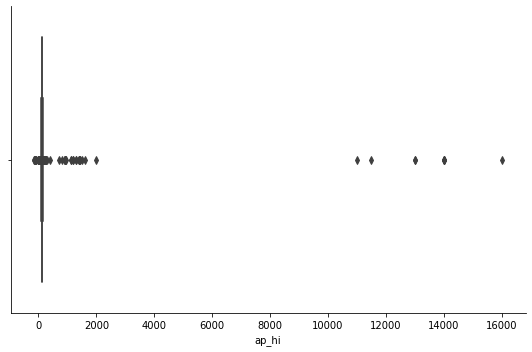

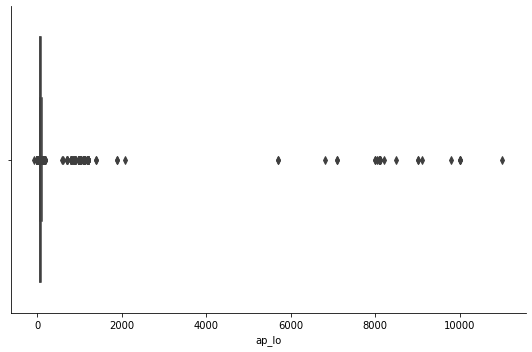

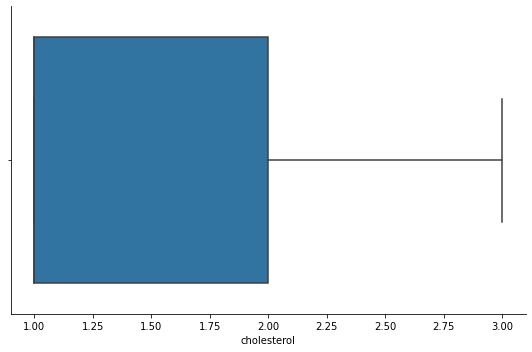

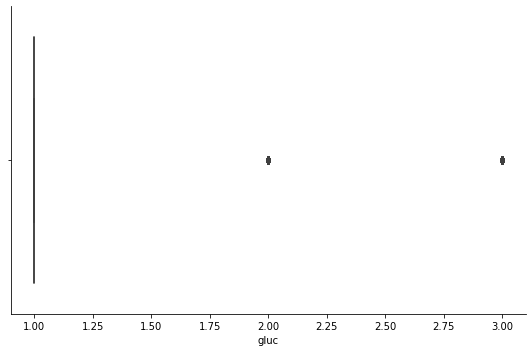

In [17]:
sns.catplot('age', data=df, kind="box", aspect=1.5)
sns.catplot('height', data=df, kind="box", aspect=1.5)
sns.catplot('weight', data=df, kind="box", aspect=1.5)
sns.catplot('ap_hi', data=df, kind="box", aspect=1.5)
sns.catplot('ap_lo', data=df, kind="box", aspect=1.5)
sns.catplot('cholesterol', data=df, kind="box", aspect=1.5)
sns.catplot('gluc', data=df, kind="box", aspect=1.5)


---
TRATAMENTO DE DADOS
---
---

In [193]:
#df = df.drop(df.loc[df['height'] < 140].index)
#df = df.drop(df.loc[df['weight'] < 40].index)
#df = df.drop(df.loc[(df['ap_hi'] > 360) | (df['ap_hi'] < 30)].index)
#df = df.drop(df.loc[(df['ap_lo'] > 250) | (df['ap_lo'] < 30)].index)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [187]:
def get_outliers(frame : pd.DataFrame, column : str):
    return frame.loc[(frame[column] < frame[column].mean() - frame[column].std()) & (frame[column] > frame[column].mean() + frame[column].std())]

def remove_outliers(frame : pd.DataFrame, column : str):
    return frame.drop(frame.loc[(frame[column] < frame[column].mean() - frame[column].std()) & (frame[column] > frame[column].mean() + frame[column].std())].index)

In [119]:
# BMI = weight / height^2

df['BMI'] = (df.weight) / ((df.height / 100) * (df.height / 100))

In [120]:
def bin_BMI(bmi):
    if bmi < 18.5: # underweight 
        return 1
    elif bmi < 25: # normal
        return 2
    elif bmi < 30: # overweight
        return 3
    elif bmi < 35: # obese
        return 4
    else:          # extremely obese
        return 5 

In [121]:
import math

def calculate_age(days):
    return math.floor(days / 365.0)

In [ ]:
df['BMI_binned'] = df['BMI'].apply(bin_BMI)

In [ ]:
df['age'] = df['age'].apply(calculate_age)

In [135]:
def bin_age(age):
    if age < 30:
        return 1
    elif age < 40:
        return 2
    elif age < 50:
        return 3
    elif age < 60:
        return 4
    else:    
        return 5 

In [136]:
df['age_binned'] = df['age'].apply(bin_age)

In [140]:
x = df.drop(['id', 'cardio', 'weight', 'height', 'BMI'], axis=1)
y = df['cardio'].to_frame()

---
MODELOS
---
---

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=2022, criterion='gini', max_depth=10)
scores = cross_val_score(clf, x, y, cv=10)
print(scores)
print('RESULT: %0.2f accuracy with a standard deviation of %0.2f' % (scores.mean(), scores.std()))
print(scores.mean())

[0.72342857 0.72642857 0.733      0.73       0.72157143 0.72985714
 0.72771429 0.73428571 0.72542857 0.72642857]
RESULT: 0.73 accuracy with a standard deviation of 0.00
0.7278142857142857


In [99]:
from sklearn.model_selection import train_test_split

best_accuracy = 0
best_criterion = ""
best_max_depth = 0

for i in range(1,10):
    for c in ["gini","entropy"]:
        clf = DecisionTreeClassifier(random_state=2022, criterion=c, max_depth=i)
        scores = cross_val_score(clf, x, y, cv=10)
        new_acc = scores.mean()
        if new_acc > best_accuracy:
            best_accuracy = new_acc
            best_criterion = c
            best_max_depth = i

print("Best accuracy:", best_accuracy)
print("best_criterion:", best_criterion)
print("best_max_depth:", best_max_depth)

Best accuracy: 0.7318
best_criterion: gini
best_max_depth: 6
